**Logistic Regression Model Evaluation & Naive Bayes Model Evaluation**

**Logistic Regression** is a supervised learning algorithm primarily used for binary classification tasks. Evaluating its performance involves several metrics and techniques to determine how well the model predicts the target variable.

**Naive Bayes** is a probabilistic classifier based on Bayes' theorem with the assumption of feature independence. It is commonly used for text classification tasks.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Naive Bayes model
nb_model = MultinomialNB()

# Train the Logistic Regression model
log_reg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_confusion = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {log_reg_accuracy}")
print(f"Precision: {log_reg_precision}")
print(f"Recall: {log_reg_recall}")
print(f"F1 Score: {log_reg_f1}")
print(f"Confusion Matrix:\n{log_reg_confusion}")

# Train the Naive Bayes model
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_confusion = confusion_matrix(y_test, y_pred_nb)

print("\nNaive Bayes Model Evaluation:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")
print(f"Confusion Matrix:\n{nb_confusion}")

# Optional: Perform Hyperparameter Tuning using GridSearchCV (for Logistic Regression, as an example)
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters from grid search
print("\nBest Hyperparameters from GridSearchCV for Logistic Regression:")
print(grid_search.best_params_)

# Evaluate the best Logistic Regression model from GridSearchCV
best_log_reg_model = grid_search.best_estimator_
y_pred_best_log_reg = best_log_reg_model.predict(X_test_tfidf)

# Evaluation metrics for the best model
best_log_reg_accuracy = accuracy_score(y_test, y_pred_best_log_reg)
best_log_reg_precision = precision_score(y_test, y_pred_best_log_reg)
best_log_reg_recall = recall_score(y_test, y_pred_best_log_reg)
best_log_reg_f1 = f1_score(y_test, y_pred_best_log_reg)
best_log_reg_confusion = confusion_matrix(y_test, y_pred_best_log_reg)

print("\nBest Logistic Regression Model Evaluation:")
print(f"Accuracy: {best_log_reg_accuracy}")
print(f"Precision: {best_log_reg_precision}")
print(f"Recall: {best_log_reg_recall}")
print(f"F1 Score: {best_log_reg_f1}")
print(f"Confusion Matrix:\n{best_log_reg_confusion}")


Logistic Regression Model Evaluation:
Accuracy: 0.7027027027027027
Precision: 0.6818181818181818
Recall: 0.7894736842105263
F1 Score: 0.7317073170731707
Confusion Matrix:
[[11  7]
 [ 4 15]]

Naive Bayes Model Evaluation:
Accuracy: 0.7567567567567568
Precision: 0.8571428571428571
Recall: 0.631578947368421
F1 Score: 0.7272727272727273
Confusion Matrix:
[[16  2]
 [ 7 12]]

Best Hyperparameters from GridSearchCV for Logistic Regression:
{'C': 10, 'solver': 'liblinear'}

Best Logistic Regression Model Evaluation:
Accuracy: 0.7837837837837838
Precision: 0.7619047619047619
Recall: 0.8421052631578947
F1 Score: 0.8
Confusion Matrix:
[[13  5]
 [ 3 16]]


##Hyperparameters:
**Type of Naïve Bayes** (choose based on data type):

Gaussian Naïve Bayes (for continuous features)

Multinomial Naïve Bayes (for count-based features, like term frequency in text)




**Evaluation Metrics:**

Accuracy (if classes are balanced)

Precision, Recall, F1-score (for imbalanced datasets)

AUC-ROC (to evaluate probabilistic outputs)


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/processedMD.csv')

# Assuming the dataset has columns 'text' and 'label'
data.dropna(subset=['text', 'label'], inplace=True)
X = data['text']
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Transformation
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Naive Bayes model
nb_model = MultinomialNB()

# Train the Logistic Regression model
log_reg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_confusion = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {log_reg_accuracy}")
print(f"Precision: {log_reg_precision}")
print(f"Recall: {log_reg_recall}")
print(f"F1 Score: {log_reg_f1}")
print(f"Confusion Matrix:\n{log_reg_confusion}")

# Train the Naive Bayes model
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test_tfidf)[:, 1])
nb_confusion = confusion_matrix(y_test, y_pred_nb)

print("\nNaive Bayes Model Evaluation:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")
print(f"AUC-ROC: {nb_roc_auc}")
print(f"Confusion Matrix:\n{nb_confusion}")

# Hyperparameter Tuning for Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, n_jobs=-1)

# Fit the model
grid_search_lr.fit(X_train_tfidf, y_train)

# Get the best parameters from grid search
print("\nBest Hyperparameters from GridSearchCV for Logistic Regression:")
print(grid_search_lr.best_params_)

# Evaluate the best Logistic Regression model from GridSearchCV
best_log_reg_model = grid_search_lr.best_estimator_
y_pred_best_log_reg = best_log_reg_model.predict(X_test_tfidf)

# Evaluation metrics for the best model
best_log_reg_accuracy = accuracy_score(y_test, y_pred_best_log_reg)
best_log_reg_precision = precision_score(y_test, y_pred_best_log_reg)
best_log_reg_recall = recall_score(y_test, y_pred_best_log_reg)
best_log_reg_f1 = f1_score(y_test, y_pred_best_log_reg)
best_log_reg_confusion = confusion_matrix(y_test, y_pred_best_log_reg)

print("\nBest Logistic Regression Model Evaluation:")
print(f"Accuracy: {best_log_reg_accuracy}")
print(f"Precision: {best_log_reg_precision}")
print(f"Recall: {best_log_reg_recall}")
print(f"F1 Score: {best_log_reg_f1}")
print(f"Confusion Matrix:\n{best_log_reg_confusion}")

# Hyperparameter Tuning for Naive Bayes
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0]}
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, n_jobs=-1)

# Fit the model
grid_search_nb.fit(X_train_tfidf, y_train)

# Get the best parameters from grid search
print("\nBest Hyperparameters from GridSearchCV for Naive Bayes:")
print(grid_search_nb.best_params_)

# Evaluate the best Naive Bayes model from GridSearchCV
best_nb_model = grid_search_nb.best_estimator_
y_pred_best_nb = best_nb_model.predict(X_test_tfidf)

# Evaluation metrics for the best Naive Bayes model
best_nb_accuracy = accuracy_score(y_test, y_pred_best_nb)
best_nb_precision = precision_score(y_test, y_pred_best_nb)
best_nb_recall = recall_score(y_test, y_pred_best_nb)
best_nb_f1 = f1_score(y_test, y_pred_best_nb)
best_nb_roc_auc = roc_auc_score(y_test, best_nb_model.predict_proba(X_test_tfidf)[:, 1])
best_nb_confusion = confusion_matrix(y_test, y_pred_best_nb)

print("\nBest Naive Bayes Model Evaluation:")
print(f"Accuracy: {best_nb_accuracy}")
print(f"Precision: {best_nb_precision}")
print(f"Recall: {best_nb_recall}")
print(f"F1 Score: {best_nb_f1}")
print(f"AUC-ROC: {best_nb_roc_auc}")
print(f"Confusion Matrix:\n{best_nb_confusion}")

<ipython-input-5-927dca17cf02>:11: DtypeWarning: Columns (0,3,4,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/processedMD.csv')


Logistic Regression Model Evaluation:
Accuracy: 0.9299754299754299
Precision: 0.9386385426653883
Recall: 0.9175257731958762
F1 Score: 0.9279620853080569
Confusion Matrix:
[[6238  384]
 [ 528 5874]]

Naive Bayes Model Evaluation:
Accuracy: 0.8132678132678133
Precision: 0.8471493529206016
Recall: 0.7566385504529834
F1 Score: 0.7993399339933993
AUC-ROC: 0.8919058299793243
Confusion Matrix:
[[5748  874]
 [1558 4844]]

Best Hyperparameters from GridSearchCV for Logistic Regression:
{'C': 10, 'solver': 'liblinear'}

Best Logistic Regression Model Evaluation:
Accuracy: 0.9386517199017199
Precision: 0.9478816946442846
Recall: 0.9261168384879725
F1 Score: 0.9368728766690368
Confusion Matrix:
[[6296  326]
 [ 473 5929]]

Best Hyperparameters from GridSearchCV for Naive Bayes:
{'alpha': 0.01}

Best Naive Bayes Model Evaluation:
Accuracy: 0.8138820638820639
Precision: 0.8488249736934409
Recall: 0.7560137457044673
F1 Score: 0.7997356245869134
AUC-ROC: 0.8927235627721669
Confusion Matrix:
[[5760  862

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

ValueError: mount failed

**Random Forest Model Accuracy**

The accuracy of a Random Forest model is a performance metric that evaluates how well the model's predictions match the true labels in a classification task. It represents the proportion of correctly classified instances out of the total number of instances.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# For train_data (assuming it already has a 'text' and 'label' column)
X_train = train_data['text']
y_train = train_data['label']

# For fake_news_data, we label it as '0' (fake news)
fake_news_data['label'] = 0
X_fake = fake_news_data['text']
y_fake = fake_news_data['label']

# For real_news_data, we label it as '1' (real news)
real_news_data['label'] = 1
X_real = real_news_data['text']
y_real = real_news_data['label']

# Combine fake and real news into a single dataset
X_combined = pd.concat([X_fake, X_real], axis=0)
y_combined = pd.concat([y_fake, y_real], axis=0)

# Shuffle the dataset
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Split into train and test data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"Random Forest Model Accuracy: {accuracy}")


Random Forest Model Accuracy: 0.8378378378378378


**SVM Model Evaluation**

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification, regression, and outlier detection tasks. SVM works by finding a hyperplane that best separates data points of different classes in a feature space, maximizing the margin between them.

In [ ]:
from sklearn.svm import SVC

# Instantiate SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"Confusion Matrix:\n{svm_confusion}")



SVM Model Evaluation:
Accuracy: 0.7567567567567568
Precision: 0.7777777777777778
Recall: 0.7368421052631579
F1 Score: 0.7567567567567568
Confusion Matrix:
[[14  4]
 [ 5 14]]


**Hyperparameters:**

Kernel (linear, rbf, poly, sigmoid)

C (Regularization): Balances margin size and misclassification penalty (range: 0.001–100).

Gamma (for rbf and poly kernels): Controls the influence of a single training example (range: 0.001–1.0).

Degree (for poly kernel): Specifies polynomial degree (e.g., 2, 3, 4).

**Evaluation Metrics:**

Accuracy

Precision, Recall, F1-score

AUC-ROC


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
file_path = '/content/drive/MyDrive/processedMD.csv'
data = pd.read_csv(file_path, low_memory=False)

# Inspect dataset
#print(data.head())

# Assuming the dataset has 'text' and 'label' columns
data.dropna(subset=['text', 'label'], inplace=True)
X = data['text']
y = data['label']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# The rest of the SVM implementation remains the same
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize

# Define hyperparameters for tuning
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1.0],
    'degree': [2, 3, 4]
}

# Instantiate SVC model
svm_model = SVC(random_state=42, probability=True)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Retrieve the best model
best_svm_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred_svm = best_svm_model.predict(X_test_tfidf)
y_pred_proba = best_svm_model.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for AUC-ROC

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='binary')
svm_recall = recall_score(y_test, y_pred_svm, average='binary')
svm_f1 = f1_score(y_test, y_pred_svm, average='binary')
svm_roc_auc = roc_auc_score(label_binarize(y_test, classes=[0, 1]), y_pred_proba)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

# Print evaluation metrics
print("\nSVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"AUC-ROC: {svm_roc_auc}")
print(f"Confusion Matrix:\n{svm_confusion}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: 


SVM Model Evaluation:
Accuracy: 0.6756756756756757
Precision: 0.6842105263157895
Recall: 0.6842105263157895
F1 Score: 0.6842105263157895
Confusion Matrix:
[[12  6]
 [ 6 13]]


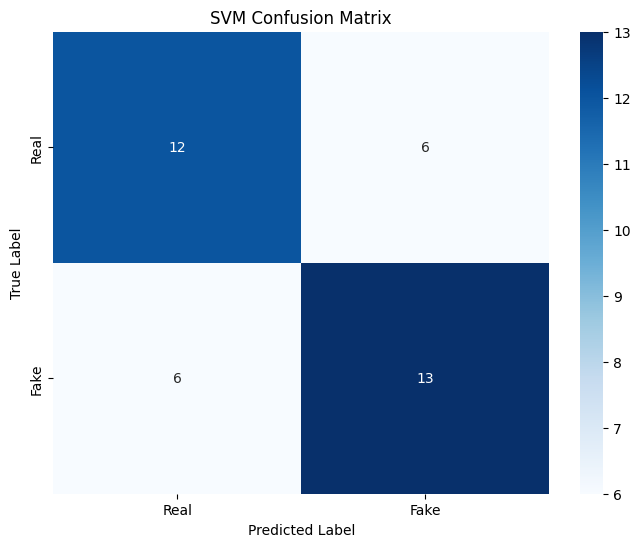

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing for fake and real news datasets
fake_news_data['label'] = 0  # Label fake news as 0
real_news_data['label'] = 1  # Label real news as 1

# Combine fake and real news into a single dataset
X_combined = pd.concat([fake_news_data['text'], real_news_data['text']])
y_combined = pd.concat([fake_news_data['label'], real_news_data['label']])

# Shuffle the data
from sklearn.utils import shuffle
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Preprocessing for SVM (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Preprocessing for LSTM (Tokenization and Padding)
max_words = 5000
max_sequence_length = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# --- SVM Model ---
# Instantiate and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"Confusion Matrix:\n{svm_confusion}")

# SVM Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



**Hyperparameter Tuning**

Hyperparameter tuning (or hyperparameter optimization) refers to the process of selecting the best set of hyperparameters for a machine learning model to maximize its performance. Hyperparameters are external configuration settings that control the training process and structure of a model but are not learned from the data itself. They need to be set before training the model and can significantly impact model performance.

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("\nBest Parameters (GridSearchCV):", grid_search.best_params_)

# Evaluate the model
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
print("\nAccuracy (GridSearchCV):", accuracy_score(y_test, y_pred_grid))

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in range(10, 200, 10)],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print("\nBest Parameters (RandomizedSearchCV):", random_search.best_params_)

# Evaluate the model
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
print("\nAccuracy (RandomizedSearchCV):", accuracy_score(y_test, y_pred_random))


Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters (GridSearchCV): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

Accuracy (GridSearchCV): 1.0
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best Parameters (RandomizedSearchCV): {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}

Accuracy (RandomizedSearchCV): 1.0


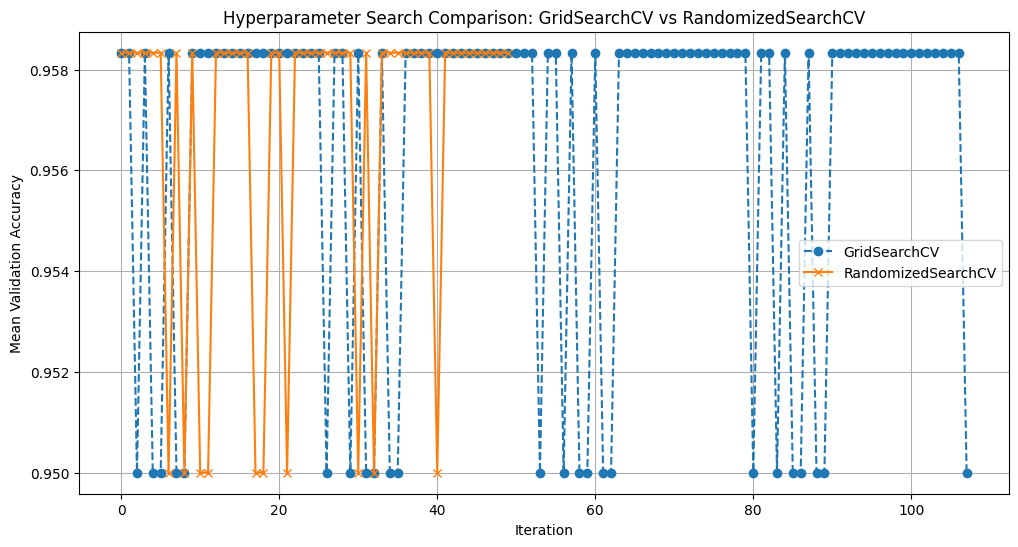

In [ ]:
import matplotlib.pyplot as plt

# Extract validation scores from GridSearchCV
grid_results = grid_search.cv_results_
grid_mean_scores = grid_results['mean_test_score']

# Extract validation scores from RandomizedSearchCV
random_results = random_search.cv_results_
random_mean_scores = random_results['mean_test_score']

# Plot comparison
plt.figure(figsize=(12, 6))

# GridSearchCV plot
plt.plot(range(len(grid_mean_scores)), grid_mean_scores, label='GridSearchCV', marker='o', linestyle='--')

# RandomizedSearchCV plot
plt.plot(range(len(random_mean_scores)), random_mean_scores, label='RandomizedSearchCV', marker='x', linestyle='-')

# Add labels, legend, and title
plt.xlabel('Iteration')
plt.ylabel('Mean Validation Accuracy')
plt.title('Hyperparameter Search Comparison: GridSearchCV vs RandomizedSearchCV')
plt.legend()
plt.grid(True)
plt.show()


**LSTM Model Evaluation**

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) designed to learn and model sequences of data, particularly useful for time series, natural language processing, and other tasks that involve sequential data. LSTM models are capable of learning long-term dependencies by overcoming the vanishing gradient problem faced by traditional RNNs.

Evaluating an LSTM model involves assessing its performance using various metrics depending on the nature of the task, typically classification or regression. These metrics help determine how well the LSTM model can predict or generate sequences.



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
import re

# Configurable parameters
hidden_units = 64  # Reduced hidden units (e.g., 50–256)
learning_rate = 0.001  # Learning rate (e.g., 0.001–0.01)
batch_size = 16  # Lower batch size for faster training
dropout_rate = 0.3  # Dropout rate (e.g., 0.2–0.5)
num_layers = 1  # Reduced to 1 layer for simplicity
max_sequence_length = 100  # Reduced sequence length for faster computation
max_words = 5000  # Max number of words for tokenizer
optimizer_type = 'adam'  # Optimizer ('adam' or 'rmsprop')
sample_fraction = 0.1  # Use 10% of the dataset for faster testing

# Load the dataset
file_path = '/content/drive/MyDrive/processedMD.csv'
df = pd.read_csv(file_path, low_memory=False)

# Filter the dataset to keep only valid labels (0 and 1)
valid_labels = [0, 1]
df = df[df['label'].isin(valid_labels)]

# Sample the dataset for faster execution
df = df.sample(frac=sample_fraction, random_state=42)

# Ensure 'label' column is numeric and free of non-finite values
y = pd.to_numeric(df['label'], errors='coerce').fillna(0).astype(int)

# Extract and clean the text data
X = df['text']

def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return ''

X = X.apply(clean_text)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debug: Check unique values and shapes
#print("Unique values in y_train:", np.unique(y_train))
#print("Shape of y_train:", y_train.shape)
#print("First few values of y_train:", y_train.head())

# Ensure y_train is a Pandas Series (not DataFrame)
y_train = y_train.squeeze()

# Ensure X_train and y_train have the same length and reset index for alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Tokenization and padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Ensure X_train and y_train are numpy arrays
X_train = X_train.to_numpy()  # Convert X_train to a numpy array
y_train = y_train.to_numpy()  # Convert y_train to a numpy array

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

# Create class weight dictionary
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Print class weights for verification
#print("Class weights:", class_weight_dict)

# Initialize optimizer
if optimizer_type.lower() == 'adam':
    optimizer = Adam(learning_rate=learning_rate)
elif optimizer_type.lower() == 'rmsprop':
    optimizer = RMSprop(learning_rate=learning_rate)
else:
    raise ValueError("Unsupported optimizer type. Use 'adam' or 'rmsprop'.")

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))  # Removed input_length argument

for _ in range(num_layers - 1):
    model.add(Bidirectional(LSTM(hidden_units, return_sequences=True, dropout=dropout_rate)))

model.add(LSTM(hidden_units, dropout=dropout_rate))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Check the shape of the padded sequences
#print("Shape of X_train_padded:", X_train_padded.shape)
#print("Shape of y_train:", y_train.shape)

# Train the model
history = model.fit(
    X_train_padded,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_data=(X_test_padded, y_test),
    class_weight=class_weight_dict,  # Use the created class weight dictionary
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Final Loss: {loss}, Final Accuracy: {accuracy}")

Epoch 1/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 51s 134ms/step - accuracy: 0.7540 - loss: 0.5118 - val_accuracy: 0.8710 - val_loss: 0.3087
Epoch 2/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - accuracy: 0.9332 - loss: 0.1742 - val_accuracy: 0.8680 - val_loss: 0.3183
Epoch 3/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 44s 96ms/step - accuracy: 0.9673 - loss: 0.0968 - val_accuracy: 0.8574 - val_loss: 0.4507
Epoch 4/10
330/330 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9800 - loss: 0.0561 - val_accuracy: 0.8437 - val_loss: 0.4953
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8622 - loss: 0.3347
Final Loss: 0.30874350666999817, Final Accuracy: 0.8710166811943054


##Stacked LSTM

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Import Tokenizer from the correct location
from tensorflow.keras.preprocessing.text import Tokenizer

# 1. Data Preprocessing
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Infosys/MergedDataset.csv', low_memory=False)


# Select the relevant features and target
features = data[['title', 'text', 'subject']]
target = data['label']

# Text preprocessing: Convert text into sequences of integers
# Create a new instance of Tokenizer to avoid shadowing
tokenizer = Tokenizer(num_words=5000)  # Limit to top 5000 words

# Combine title, text, and subject for tokenization
combined_text = features['title'].astype(str) + ' ' + features['text'].astype(str) + ' ' + features['subject'].astype(str)
tokenizer.fit_on_texts(combined_text)
X = tokenizer.texts_to_sequences(combined_text)

# Pad sequences to ensure they have the same length
max_sequence_length = 100  # Adjust as needed
X = pad_sequences(X, maxlen=max_sequence_length)

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(target)
y = to_categorical(y)  # Convert to one-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Building the Stacked LSTM Model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=5000, output_dim=128))

# LSTM layers
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))

# 3. Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 5. Evaluation and prediction
test_loss, test_accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Predictions (first 5): {predictions[:5]}") #run again

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8592 - loss: 0.2767 - val_accuracy: 0.9698 - val_loss: 0.0780
Epoch 2/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9783 - loss: 0.0604 - val_accuracy: 0.9755 - val_loss: 0.0665
Epoch 3/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9880 - loss: 0.0346 - val_accuracy: 0.9746 - val_loss: 0.0763
Epoch 4/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9901 - loss: 0.0289 - val_accuracy: 0.9695 - val_loss: 0.0899
Epoch 5/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9716 - val_loss: 0.1074
Epoch 6/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9707 - val_loss: 0.1021
Epoch 7/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.9699 - val_loss: 0.1281
Epoch 8/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9981 -

**Bi Directional LSTM**

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer  # Import Tokenizer
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# 1. Data Preprocessing
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Infosys/MergedDataset.csv', low_memory=False)

# Select relevant features and target
features = data[['title', 'text', 'subject']]
target = data['label']

# Text preprocessing: Convert text into sequences of integers
tokenizer = Tokenizer(num_words=5000)  # Limit to top 5000 words
combined_text = features['title'].astype(str) + ' ' + features['text'].astype(str) + ' ' + features['subject'].astype(str)
tokenizer.fit_on_texts(combined_text)
X = tokenizer.texts_to_sequences(combined_text)

# Pad sequences to ensure they have the same length
max_sequence_length = 100  # Adjust as needed
X = pad_sequences(X, maxlen=max_sequence_length)

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(target)
y = to_categorical(y)  # Convert to one-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Building the Bi-directional LSTM Model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=5000, output_dim=128))

# Bi-directional LSTM layer (added here)
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))

# Fully connected output layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))

# 3. Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 5. Evaluation and prediction
test_loss, test_accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Predictions (first 5): {predictions[:5]}")

Epoch 1/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9210 - loss: 0.2055 - val_accuracy: 0.9709 - val_loss: 0.0737
Epoch 2/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9801 - loss: 0.0550 - val_accuracy: 0.9716 - val_loss: 0.0710
Epoch 3/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9895 - loss: 0.0288 - val_accuracy: 0.9678 - val_loss: 0.0916
Epoch 4/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9722 - val_loss: 0.1018
Epoch 5/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy: 0.9713 - val_loss: 0.1470
Epoch 6/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9988 - loss: 0.0031 - val_accuracy: 0.9704 - val_loss: 0.1816
Epoch 7/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9591 - val_loss: 0.1691
Epoch 8/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9991 -

**ANN**
An Artificial Neural Network (ANN) is a computational model inspired by the structure and functioning of the human brain. It is widely used in machine learning for solving complex problems such as classification, regression, pattern recognition, and more.

Ensure all datasets have 'text' and 'label' columns!
Ensure all datasets have 'text' and 'label' columns!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8573 - loss: 0.3360 - val_accuracy: 0.9317 - val_loss: 0.1692
Epoch 2/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9539 - loss: 0.1291 - val_accuracy: 0.9428 - val_loss: 0.1527
Epoch 3/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9773 - loss: 0.0697 - val_accuracy: 0.9452 - val_loss: 0.1611
Epoch 4/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9881 - loss: 0.0374 - val_accuracy: 0.9452 - val_loss: 0.1883
Epoch 5/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9928 - loss: 0.0244 - val_accuracy: 0.9472 - val_loss: 0.2202
Epoch 6/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9472 - val_loss: 0.2321
Epoch 7/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9953 - loss: 0.0156 - val_accuracy: 0.9496 - val_loss: 0.2444
Epoch 8/10
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9955 -

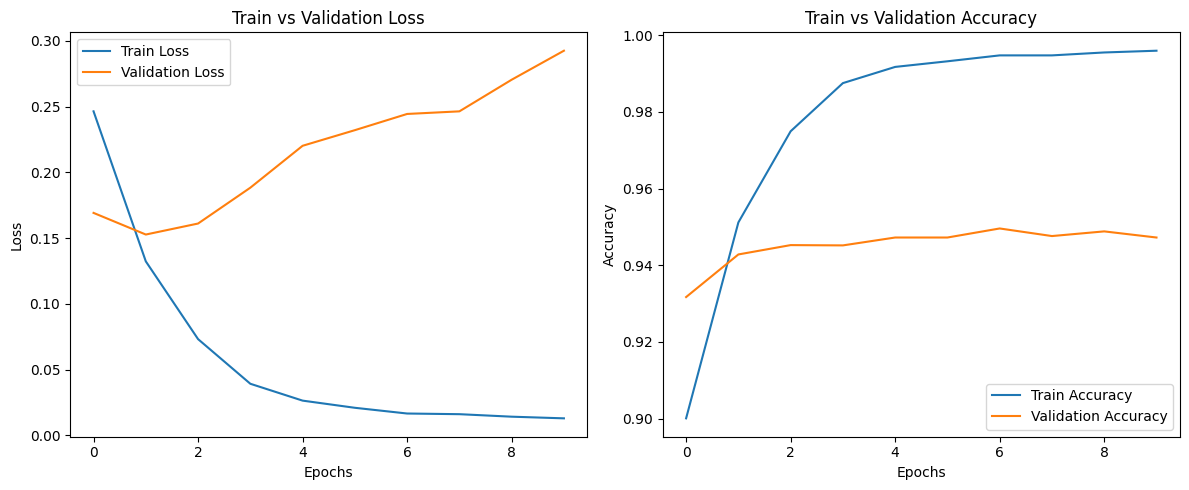

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Ensure this import is included
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load datasets
dt1_df = pd.read_csv(r'/content/drive/MyDrive/Infosys/train.csv')
dt2_df = pd.read_csv(r'/content/drive/MyDrive/Infosys/BuzzFeed_fake_news_content.csv')
dt3_df = pd.read_csv(r'/content/drive/MyDrive/Infosys/Processed_real_news_data.csv')
dt4_df = pd.read_csv(r'/content/drive/MyDrive/Infosys/News.csv')

# Combine datasets (assuming a 'text' column for news content and a 'label' column for real/fake labels)
dataframes = [dt1_df, dt2_df, dt3_df, dt4_df]
for df in dataframes:
    if 'label' not in df.columns or 'text' not in df.columns:
        print("Ensure all datasets have 'text' and 'label' columns!")
        exit()

combined_df = pd.concat(dataframes, ignore_index=True)

# Preprocess data
combined_df.dropna(subset=['text', 'label'], inplace=True)

# Encode labels
label_encoder = LabelEncoder()
combined_df['label'] = label_encoder.fit_transform(combined_df['label'])

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(combined_df['text']).toarray()
y = combined_df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**RNN**

A Recurrent Neural Network (RNN) is a type of neural network designed to handle sequential data by maintaining a memory of previous inputs in the sequence. Unlike traditional feedforward neural networks, RNNs have connections that form loops, allowing information to persist and enabling the network to exhibit dynamic temporal behavior.

RNNs are particularly useful for tasks where the order of the input data matters, such as time series forecasting, natural language processing (NLP), and speech recognition.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 16)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5124 - loss: 0.7062 - val_accuracy: 0.5250 - val_loss: 0.6843
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4992 - loss: 0.6825 - val_accuracy: 0.5250 - val_loss: 0.6598
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5483 - loss: 0.6505 - val_accuracy: 0.5500 - val_loss: 0.6028
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5609 - loss: 0.5958 - val_accuracy: 0.6250 - val_loss: 0.5165
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6619 - loss: 0.5067 - val_accuracy: 0.8062 - val_loss: 0.4418
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8010 - loss: 0.4495 - val_accuracy: 0.9125 - val_loss: 0.3952
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8870 - loss: 0.4166 - val_accuracy: 0.9375 - val_loss: 0.3500
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8997 - loss: 0.3828 - val_accuracy: 0.9563 - val

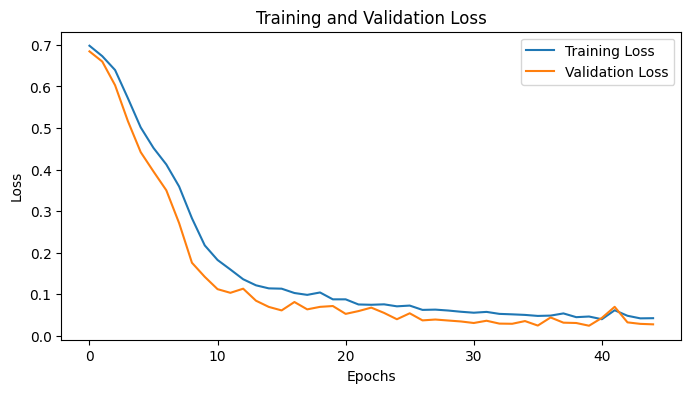

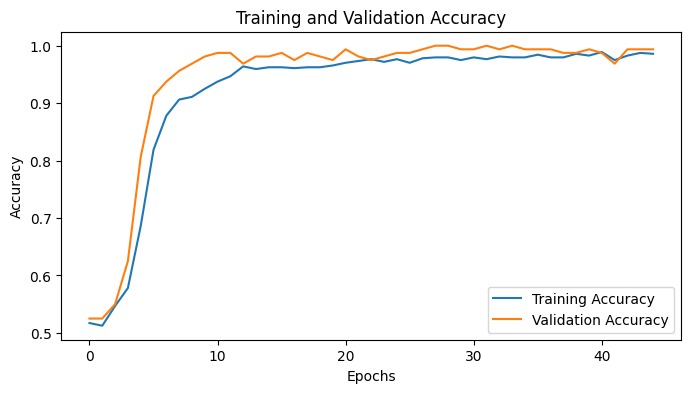

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.callbacks import EarlyStopping

# Step 1: Generate or Load Sequential Data
# For this example, we'll generate synthetic sequential data
def generate_sequence_data(n_samples=1000, n_timesteps=10, n_features=1):
    X = np.random.randn(n_samples, n_timesteps, n_features)  # Random time-series data
    y = (np.mean(X, axis=1) > 0).astype(int).flatten()       # Label: Mean > 0 -> 1, else 0
    return X, y

# Generate synthetic sequential dataset
n_timesteps = 10
n_features = 1
X, y = generate_sequence_data(n_samples=1000, n_timesteps=n_timesteps, n_features=n_features)

# Step 2: Data Preprocessing
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the RNN Model
# Initialize the model
model = Sequential()

# Add layers
model.add(SimpleRNN(16, input_shape=(n_timesteps, n_features), activation='relu'))  # RNN layer
model.add(Dense(8, activation='relu'))                                              # Dense hidden layer
model.add(Dense(1, activation='sigmoid'))                                           # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Step 4: Train the Model
# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,    # Use 20% of training data for validation
    epochs=50,               # Maximum number of epochs
    batch_size=32,           # Mini-batch size
    callbacks=[early_stopping], # Use early stopping
    verbose=1                # Print training progress
)

# Step 5: Evaluate the Model
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 6: Analyze Results
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Visualize Training History
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##CNN
A Convolutional Neural Network (CNN) is a type of deep learning algorithm specifically designed for processing structured grid data, such as images, though it can be adapted for other data types like time series or text. CNNs are particularly effective for tasks involving visual recognition and classification due to their ability to automatically and adaptively learn spatial hierarchies of features.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8502 - loss: 0.4727 - val_accuracy: 0.9819 - val_loss: 0.0591
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9721 - loss: 0.0965 - val_accuracy: 0.9869 - val_loss: 0.0441
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 36ms/step - accuracy: 0.9805 - loss: 0.0634 - val_accuracy: 0.9872 - val_loss: 0.0419
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9857 - loss: 0.0475 - val_accuracy: 0.9897 - val_loss: 0.0386
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.9902 - val_loss: 0.0376
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9896 - loss: 0.0349 - val_accuracy: 0.9902 - val_loss: 0.0361
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9923 - val_loss: 0.0347
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9924 -

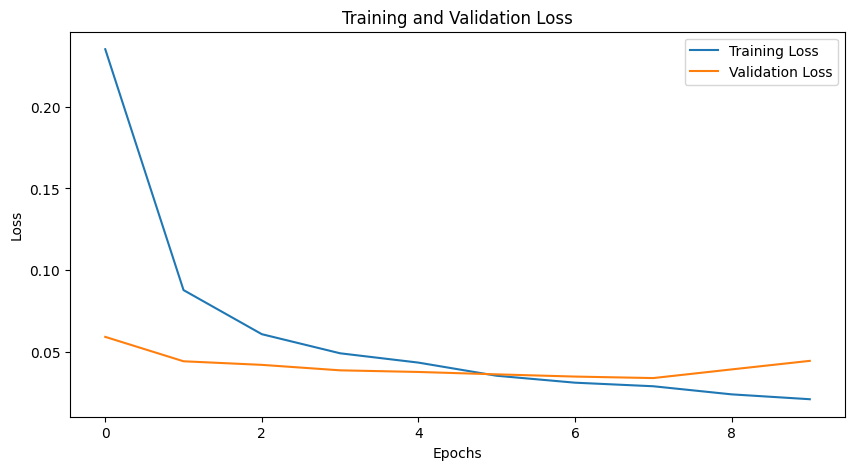

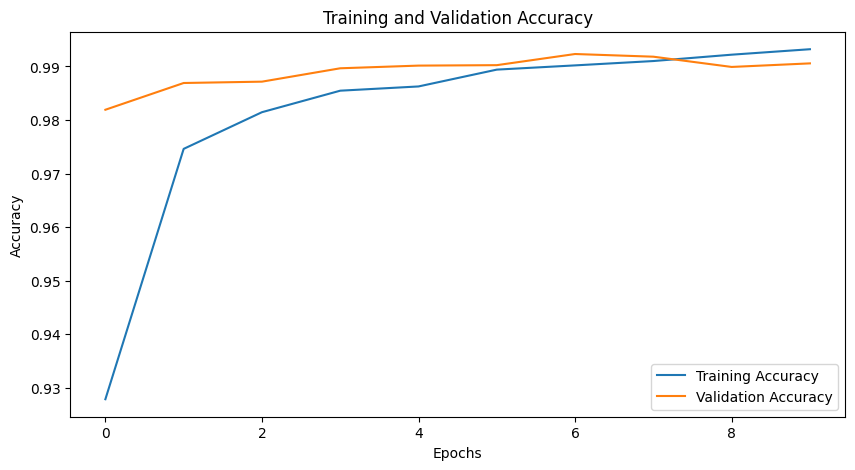

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Step 1: Load the datasets
newsdt = pd.read_csv(r'/content/drive/MyDrive/Infosys/News.csv')
traindt = pd.read_csv(r'/content/drive/MyDrive/Infosys/train.csv')
merged_dataset_path = pd.read_csv(r'/content/drive/MyDrive/Infosys/BuzzFR.csv')

# Assuming 'text' and 'label' columns in your datasets
# You can adjust column names based on your actual dataset structure

# Clean the 'text' column: Convert all values to strings, and handle missing/NaN values
newsdt['text'] = newsdt['text'].astype(str)  # Convert to string
newsdt['text'] = newsdt['text'].fillna('')  # Replace NaN with an empty string

# Assuming 'label' is categorical, encode it if necessary
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
news_labels = label_encoder.fit_transform(newsdt['label'])

# Step 2: Preprocess the text data (tokenization and padding)
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Limit to top 10,000 words
tokenizer.fit_on_texts(newsdt['text'])
X = tokenizer.texts_to_sequences(newsdt['text'])

# Pad the sequences to make sure they are of equal length
max_len = 500  # Maximum sequence length
X = pad_sequences(X, maxlen=max_len)

# Convert labels to a numpy array
y = np.array(news_labels)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For this example, we'll use the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to add a channel dimension (required for CNN)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')  # (n_samples, height, width, channels)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # 10 classes
y_test = to_categorical(y_test, 10)

# Step 2: Build the CNN Model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer for classification
model.add(Dense(10, activation='softmax'))  # 10 classes for MNIST digits

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Step 3: Train the CNN Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,   # Use 20% of training data for validation
    epochs=10,              # Number of epochs
    batch_size=32,          # Mini-batch size
    verbose=1               # Print training progress
)

# Step 4: Evaluate the Model
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions
y_true = np.argmax(y_test, axis=1)

# Step 5: Analyze Results
# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Step 6: Visualize Training History
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## GRU
GRU (Gated Recurrent Unit) is a type of recurrent neural network (RNN) architecture designed to capture sequential data, such as time series, text, or speech. It was introduced to address some of the limitations of traditional RNNs, particularly the issues of vanishing gradients and long-term dependency learning.

GRUs are similar to another type of RNN, LSTM (Long Short-Term Memory), but are computationally simpler due to fewer parameters.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
from google.colab import drive

# Load dataset with handling mixed data types
dtype_spec = {
    'id': str,  # Assuming 'id' should be a string
    'label': float,  # Allow 'label' to be float (in case it has decimals)
    'text': str,  # 'text' should be a string
}
df = pd.read_csv('/content/drive/MyDrive/Infosys/MergedDataset.csv', dtype=dtype_spec, low_memory=False)

# Ensure 'text' and 'label' columns exist in the dataset
if 'text' not in df.columns or 'label' not in df.columns:
    raise ValueError("Ensure all datasets have 'text' and 'label' columns!")

# Prepare features (X) and labels (y)
X = df['text'].astype(str)  # Convert to string
y = df['label']

# Check if there are missing values in the dataset
if X.isnull().sum() > 0 or y.isnull().sum() > 0:
    print("Missing values found in the dataset. Handling them by dropping rows with missing values.")
    df.dropna(subset=['text', 'label'], inplace=True)
    X = df['text'].astype(str)
    y = df['label']

# Label encoding for categorical labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.2, random_state=42)

# Set maximum length of sequences
max_len = 200

# Tokenize the text data
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Build the GRU model with a Bidirectional GRU layer
model = Sequential([
    Embedding(input_dim=1000, output_dim=128, input_length=max_len),  # Embedding layer for text data
    Bidirectional(GRU(128, return_sequences=False)),  # Bidirectional GRU layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a lower learning rate and gradient clipping
optimizer = Adam(learning_rate=0.0001)  # Set a lower learning rate to avoid exploding gradients
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary to see the architecture
model.build((None, max_len))  # Ensure the model is built before printing the summary
model.summary()

# Train the model with additional monitoring to prevent overfitting
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=10, batch_size=64, verbose=2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Missing values found in the dataset. Handling them by dropping rows with missing values.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 200, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         198,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 342,657 (1.31 MB)

 Trainable params: 342,657 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
823/823 - 19s - 23ms/step - accuracy: 0.8892 - loss: 0.2745 - val_accuracy: 0.9424 - val_loss: 0.1480
Epoch 2/10
823/823 - 20s - 25ms/step - accuracy: 0.9475 - loss: 0.1316 - val_accuracy: 0.9409 - val_loss: 0.1480
Epoch 3/10
823/823 - 20s - 25ms/step - accuracy: 0.9551 - loss: 0.1146 - val_accuracy: 0.9576 - val_loss: 0.1049
Epoch 4/10
823/823 - 23s - 28ms/step - accuracy: 0.9583 - loss: 0.1067 - val_accuracy: 0.9604 - val_loss: 0.1019
Epoch 5/10
823/823 - 17s - 21ms/step - accuracy: 0.9615 - loss: 0.0985 - val_accuracy: 0.9621 - val_loss: 0.0975
Epoch 6/10
823/823 - 17s - 20ms/step - accuracy: 0.9639 - loss: 0.0935 - val_accuracy: 0.9635 - val_loss: 0.0944
Epoch 7/10
823/823 - 22s - 27ms/step - accuracy: 0.9659 - loss: 0.0880 - val_accuracy: 0.9537 - val_loss: 0.1372
Epoch 8/10
823/823 - 19s - 23ms/step - accuracy: 0.9672 - loss: 0.0854 - val_accuracy: 0.9606 - val_loss: 0.0998
Epoch 9/10
823/823 - 21s - 25ms/step - accuracy: 0.9690 - loss: 0.0812 - val_accuracy: 0.9604 - 

##Roberta Small

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, Trainer, TrainingArguments

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/processedMD.csv")
df1 = df[['text', 'label']]

# Ensure labels are numeric
df1['label'] = pd.to_numeric(df1['label'], errors='coerce').astype('Int64')

# Split Data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    df1['text'], df1['label'], test_size=0.2, random_state=42
)

# Ensure text data is in string format
X_train = X_train.astype(str).tolist()
X_test = X_test.astype(str).tolist()

# Initialize Tokenizer
model_name = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize Text Data
train_encodings = tokenizer(
    X_train, truncation=True, padding=True, max_length=256, return_tensors='pt'
)
test_encodings = tokenizer(
    X_test, truncation=True, padding=True, max_length=256, return_tensors='pt'
)

# Define Custom Dataset Class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Prepare encodings and labels as tensors
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        label = self.labels[idx]
        if pd.isnull(label):  # Handle missing labels
            label = 0
        item['labels'] = torch.tensor(int(label), dtype=torch.long)
        return item

# Prepare Datasets
y_train = y_train.fillna(0).astype(int)  # Replace NaN with 0 and convert to int
y_test = y_test.fillna(0).astype(int)

train_dataset = NewsDataset(train_encodings, list(y_train))
test_dataset = NewsDataset(test_encodings, list(y_test))

# Initialize Model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir='./content/drive/MyDrive/ColabNotebooks/results',  # Directory for saving models and logs
    evaluation_strategy="epoch",    # Evaluate at the end of each epoch
    save_strategy="epoch",          # Save model at the end of each epoch
    learning_rate=2e-5,             # Learning rate
    per_device_train_batch_size=16, # Batch size for training
    per_device_eval_batch_size=64,  # Batch size for evaluation
    num_train_epochs=3,             # Number of epochs
    weight_decay=0.01,              # Weight decay
    logging_dir='./logs',           # Directory for logging
    logging_steps=10,               # Log every 10 steps
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train Model
print("Training small RoBERTa model...")
trainer.train()

# Evaluate Model
print("Evaluating model on test data...")
predictions = trainer.predict(test_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()
print("Accuracy:", accuracy_score(y_test, predicted_labels))
print("Classification Report:")
print(classification_report(y_test, predicted_labels))


<ipython-input-3-9b92966d1d73>:8: DtypeWarning: Columns (0,3,4,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/processedMD.csv")
<ipython-input-3-9b92966d1d73>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = pd.to_numeric(df1['label'], errors='coerce').astype('Int64')
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Training small RoBERTa model...


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.096100,0.103503


Epoch,Training Loss,Validation Loss
1,0.096100,0.103503
2,0.055000,0.078643
3,0.002100,0.101923


Evaluating model on test data...


Accuracy: 0.9792125028450042
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6788
           1       0.98      0.97      0.98      6393

    accuracy                           0.98     13181
   macro avg       0.98      0.98      0.98     13181
weighted avg       0.98      0.98      0.98     13181



##Roberta Large

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, Trainer, TrainingArguments

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/bharath/processedMD.csv")
df1 = df[['text', 'label']]

# Ensure labels are numeric
df1['label'] = pd.to_numeric(df1['label'], errors='coerce').astype('Int64')

# Split Data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    df1['text'], df1['label'], test_size=0.2, random_state=42
)

# Ensure text data is in string format
X_train = X_train.astype(str).tolist()
X_test = X_test.astype(str).tolist()

# Initialize Tokenizer and Model for roberta-large
model_name = "roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize Text Data
train_encodings = tokenizer(
    X_train, truncation=True, padding=True, max_length=256, return_tensors='pt'
)
test_encodings = tokenizer(
    X_test, truncation=True, padding=True, max_length=256, return_tensors='pt'
)

# Define Custom Dataset Class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Prepare encodings and labels as tensors
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        label = self.labels[idx]
        if pd.isnull(label):  # Handle missing labels
            label = 0
        item['labels'] = torch.tensor(int(label), dtype=torch.long)
        return item

# Prepare Datasets
y_train = y_train.fillna(0).astype(int)  # Replace NaN with 0 and convert to int
y_test = y_test.fillna(0).astype(int)

train_dataset = NewsDataset(train_encodings, list(y_train))
test_dataset = NewsDataset(test_encodings, list(y_test))

# Initialize Model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir='./content/drive/MyDrive/ColabNotebooks/results',  # Directory for saving models and logs
    evaluation_strategy="epoch",    # Evaluate at the end of each epoch
    save_strategy="epoch",          # Save model at the end of each epoch
    learning_rate=2e-5,             # Learning rate
    per_device_train_batch_size=16, # Batch size for training
    per_device_eval_batch_size=64,  # Batch size for evaluation
    num_train_epochs=3,             # Number of epochs
    weight_decay=0.01,              # Weight decay
    logging_dir='./logs',           # Directory for logging
    logging_steps=10,               # Log every 10 steps
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train Model
print("Training RoBERTa-large model...")
trainer.train()

# Evaluate Model
print("Evaluating model on test data...")
predictions = trainer.predict(test_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()
print("Accuracy:", accuracy_score(y_test, predicted_labels))
print("Classification Report:")
print(classification_report(y_test, predicted_labels))


<ipython-input-3-4680475dcc4d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = pd.to_numeric(df1['label'], errors='coerce').astype('Int64')
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Training RoBERTa-large model...


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.000000,0.000001
2,0.000000,0.000000
3,0.000000,0.000000


Evaluating model on test data...


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3618

    accuracy                           1.00      3618
   macro avg       1.00      1.00      1.00      3618
weighted avg       1.00      1.00      1.00      3618



**Hyperparameter Tuning and Calculation of Performance Metrics**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
dtype_spec = {}  # Define specific data types if needed
df = pd.read_csv('/content/drive/MyDrive/Infosys/MergedDataset.csv', dtype=dtype_spec, low_memory=False)

# Inspect the dataset
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Preprocessing function
def preprocess_data(df):

    # Define the target column
    target_column = 'label'  # Adjust this if your target column has a different name
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataset.")

    # Check for missing values in the target column
    if df[target_column].isnull().any():
        print(f"Warning: Missing values found in target column '{target_column}'.")
        # Drop rows with missing target values
        df = df.dropna(subset=[target_column])

    # Separate features and target
    features = df.drop(columns=[target_column])
    target = df[target_column]

    # Encode the target column if categorical
    if target.dtype == 'object':
        le = LabelEncoder()
        target = le.fit_transform(target)

    # Separate numeric and non-numeric features
    numeric_features = features.select_dtypes(include=[np.number])
    non_numeric_features = features.select_dtypes(exclude=[np.number])

    # Scale numeric features
    if not numeric_features.empty:
        scaler = StandardScaler()
        numeric_features_scaled = scaler.fit_transform(numeric_features)
        numeric_features_scaled = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)
    else:
        numeric_features_scaled = pd.DataFrame()  # Empty DataFrame if no numeric features exist

    # Encode non-numeric features
    for col in non_numeric_features.columns:
        le = LabelEncoder()
        non_numeric_features[col] = le.fit_transform(non_numeric_features[col].astype(str))

    # Combine numeric and encoded non-numeric features
    processed_features = pd.concat(
        [numeric_features_scaled.reset_index(drop=True),
         non_numeric_features.reset_index(drop=True)],
        axis=1
    )

    return processed_features, target


# Apply preprocessing
print("\nPreprocessing Data...")
try:
    X, y = preprocess_data(df)
    print("Preprocessing Complete. Features and Target prepared.")
    print(f"Processed Features Shape: {X.shape}, Target Shape: {y.shape}")
except Exception as e:
    print(f"Error during preprocessing: {e}")
    raise

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Split:")
print(f"Training Features Shape: {X_train.shape}, Validation Features Shape: {X_val.shape}")
print(f"Training Target Shape: {y_train.shape}, Validation Target Shape: {y_val.shape}")

# Hyperparameter grids
hidden_units_list = [64, 128, 256]
learning_rates = [0.001, 0.005, 0.01]
batch_sizes = [32, 64, 128]

# Initialize variables for the best model and metrics
best_model = None
best_metrics = {'accuracy': 0}

print("\nStarting Hyperparameter Tuning...")

# Hyperparameter tuning
for hidden_units in hidden_units_list:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            # Define the model
            model = Sequential([
                Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)),
                Dense(hidden_units // 2, activation='relu'),
                Dense(1, activation='sigmoid')  # Binary classification
            ])

            # Compile the model
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)

            # Evaluate the model on the validation set
            y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
            acc = accuracy_score(y_val, y_val_pred)
            prec = precision_score(y_val, y_val_pred, zero_division=1)
            rec = recall_score(y_val, y_val_pred, zero_division=1)
            f1 = f1_score(y_val, y_val_pred, zero_division=1)

            print(f"Units: {hidden_units}, LR: {lr}, Batch: {batch_size} | Acc: {acc:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}, F1: {f1:.4f}")

            # Update the best model if current model outperforms
            if acc > best_metrics['accuracy']:
                best_metrics = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}
                best_model = model

# Finalize the best model
print("\nBest Hyperparameters and Performance Metrics:")
print(best_metrics)

# Validate the best model on the validation dataset
y_test_pred = (best_model.predict(X_val) > 0.5).astype("int32")
final_acc = accuracy_score(y_val, y_test_pred)
final_prec = precision_score(y_val, y_test_pred, zero_division=1)
final_rec = recall_score(y_val, y_test_pred, zero_division=1)
final_f1 = f1_score(y_val, y_test_pred, zero_division=1)

print("\nFinal Validation Performance Metrics:")
print(f"Accuracy: {final_acc:.4f}, Precision: {final_prec:.4f}, Recall: {final_rec:.4f}, F1-Score: {final_f1:.4f}")


Dataset Preview:
    id                                              title  \
0  0.0   Donald Trump Sends Out Embarrassing New Year’...   
1  1.0   Drunk Bragging Trump Staffer Started Russian ...   
2  2.0   Sheriff David Clarke Becomes An Internet Joke...   
3  3.0   Trump Is So Obsessed He Even Has Obama’s Name...   
4  4.0   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label author  url top_img authors source publish_date  \
0  December 31, 2017    0.0    NaN  NaN     NaN     NaN    NaN          NaN   
1  December 31, 2017    0.0    NaN  NaN     NaN     NaN    NaN          N

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Units: 64, LR: 0.001, Batch: 32 | Acc: 0.7054, Prec: 0.7283, Rec: 0.6370, F1: 0.6796


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 64, LR: 0.001, Batch: 64 | Acc: 0.6866, Prec: 0.6419, Rec: 0.8163, F1: 0.7187


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 64, LR: 0.001, Batch: 128 | Acc: 0.6084, Prec: 0.7034, Rec: 0.3486, F1: 0.4662


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 64, LR: 0.005, Batch: 32 | Acc: 0.5178, Prec: 0.5273, Rec: 0.1631, F1: 0.2491


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 64, LR: 0.005, Batch: 64 | Acc: 0.6274, Prec: 0.7715, Rec: 0.3416, F1: 0.4736


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Units: 64, LR: 0.005, Batch: 128 | Acc: 0.6930, Prec: 0.7600, Rec: 0.5468, F1: 0.6360


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 64, LR: 0.01, Batch: 32 | Acc: 0.5095, Prec: 1.0000, Rec: 0.0000, F1: 0.0000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 64, LR: 0.01, Batch: 64 | Acc: 0.6296, Prec: 0.5711, Rec: 0.9838, F1: 0.7227


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Units: 64, LR: 0.01, Batch: 128 | Acc: 0.6372, Prec: 0.5784, Rec: 0.9605, F1: 0.7220


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Units: 128, LR: 0.001, Batch: 32 | Acc: 0.6910, Prec: 0.6856, Rec: 0.6834, F1: 0.6845


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 128, LR: 0.001, Batch: 64 | Acc: 0.7026, Prec: 0.7027, Rec: 0.6823, F1: 0.6924


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Units: 128, LR: 0.001, Batch: 128 | Acc: 0.6985, Prec: 0.7295, Rec: 0.6126, F1: 0.6659


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 128, LR: 0.005, Batch: 32 | Acc: 0.5095, Prec: 1.0000, Rec: 0.0000, F1: 0.0000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 128, LR: 0.005, Batch: 64 | Acc: 0.7061, Prec: 0.7525, Rec: 0.5971, F1: 0.6659


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 128, LR: 0.005, Batch: 128 | Acc: 0.7143, Prec: 0.7952, Rec: 0.5624, F1: 0.6589


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Units: 128, LR: 0.01, Batch: 32 | Acc: 0.5094, Prec: 0.0000, Rec: 0.0000, F1: 0.0000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 128, LR: 0.01, Batch: 64 | Acc: 0.5095, Prec: 1.0000, Rec: 0.0000, F1: 0.0000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Units: 128, LR: 0.01, Batch: 128 | Acc: 0.7393, Prec: 0.7406, Rec: 0.7210, F1: 0.7307


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Units: 256, LR: 0.001, Batch: 32 | Acc: 0.7373, Prec: 0.6784, Rec: 0.8833, F1: 0.7674


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 256, LR: 0.001, Batch: 64 | Acc: 0.6531, Prec: 0.5895, Rec: 0.9641, F1: 0.7316


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 256, LR: 0.001, Batch: 128 | Acc: 0.6816, Prec: 0.7656, Rec: 0.5058, F1: 0.6091


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 256, LR: 0.005, Batch: 32 | Acc: 0.5095, Prec: 1.0000, Rec: 0.0000, F1: 0.0000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Units: 256, LR: 0.005, Batch: 64 | Acc: 0.6856, Prec: 0.6111, Rec: 0.9872, F1: 0.7549


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 256, LR: 0.005, Batch: 128 | Acc: 0.6960, Prec: 0.7108, Rec: 0.6409, F1: 0.6740


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 256, LR: 0.01, Batch: 32 | Acc: 0.5095, Prec: 1.0000, Rec: 0.0000, F1: 0.0000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 256, LR: 0.01, Batch: 64 | Acc: 0.5095, Prec: 1.0000, Rec: 0.0000, F1: 0.0000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Units: 256, LR: 0.01, Batch: 128 | Acc: 0.7234, Prec: 0.6614, Rec: 0.8935, F1: 0.7602

Best Hyperparameters and Performance Metrics:
{'accuracy': 0.7392987249544627, 'precision': 0.7406230133502861, 'recall': 0.7210273866625406, 'f1': 0.7306938455507644}
412/412 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Final Validation Performance Metrics:
Accuracy: 0.7393, Precision: 0.7406, Recall: 0.7210, F1-Score: 0.7307


In [ ]:
5b14ae265cc62e61e0bef35590d4579a5e8c46b5  API KEY